# Title: Web Scrape the Github topics & their repositories

# Introduction

## Github Topics : 

GitHub Topics are a way to discover, explore, and contribute to projects on GitHub. Topics are labels that you can add to your repositories to describe their content and make them discoverable by others interested in those subjects. GitHub Topics help organize and categorize repositories, making it easier for users to find projects related to specific technologies, programming languages, frameworks, and more.

To explore GitHub Topics, you can visit the following URL format:[link](https://github.com/topics)

For example, if you're interested in exploring repositories related to "machine learning," you can go to:[Link](https://github.com/topics/machine-learning)

## Web Scraping :

Web scraping refers to the process of extracting data from websites. This can be done manually by a human user or automatically using a web scraping tool or script. Web scraping is often used for various purposes, including data analysis, research, and automation. However, it's important to note that web scraping should be done ethically and in compliance with the terms of service of the websites being scraped. For example, 
Before scraping a website, it's important to check its robots.txt file. This file provides guidelines to web crawlers about which parts of the site can be crawled and which should be avoided. It's crucial to respect these guidelines to avoid legal issues.

We have to Respect Website Policies to avoid violation of legal terms.

In addition to that, Implement rate limiting to avoid overloading the server with too many requests in a short period. This helps in being respectful to the website's server resources.

We will use python, requests, beautiful soup, pandas for this project. 


# Project Outline
- We are going to scrape github topics from this [site](https://github.com/topics)
1. We will get a list of topics. For each topic we will get topic title, topic page url, and topic description.
2. For each topic, we will get top 25 repositories in the topic from the topic page.
3. For each repository, we will grab the repository name, username, stars and repo url.
- For each topic we will create a csv file in the following format:

'''repo name, username, stars, repo url
three.js, mrdoob, 69000, https://github.com/mrdoob/three.js'''

## Use the requests library to download web pages

In [1]:
# import request library to download the webpage
import requests

In [2]:
# Website address which we need to scrape to get the topics name
topics_url = 'https://github.com/topics'

In [3]:
# Get the webpage information through requests.get method and set in a variable name response
response = requests.get(topics_url)

In [4]:
# Now check the response of webpage , working or not?
response.status_code

200

As code response is 200 , so it does mean that web page data is readable.

In [5]:
# verify the length of text before loading all large volume of data into machine
len(response.text)

170984

In [6]:
# View the page text contents 
page_contents = response.text

In [7]:
# Show the small portion of text from whole text data
page_contents[:1000]

'\n\n<!DOCTYPE html>\n<html\n  lang="en"\n  \n  data-color-mode="auto" data-light-theme="light" data-dark-theme="dark"\n  data-a11y-animated-images="system" data-a11y-link-underlines="true"\n  >\n\n\n\n\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n  \n\n  <link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/light-38f1bf52eeeb.css" /><link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/dark-56010aa53a8f.css" /><link data-color-theme="dark_dimmed" crossor

Here you can see the page content, which is written as HTML format. We can save this document as html and then use Beautiful Soup in next step to parse the text data from html to extract the required information. 

In [8]:
with open('webpage.html', 'w', encoding='utf-8') as f:
    f.write(page_contents)

## Use Beautiful Soup to parse and extract information

In [9]:
# Import Beautiful Soup library to parse the html data
from bs4 import BeautifulSoup

In [10]:
# Set a variable name doc where can save the html parser text document
doc = BeautifulSoup(page_contents, 'html.parser')

### Find the Topic title

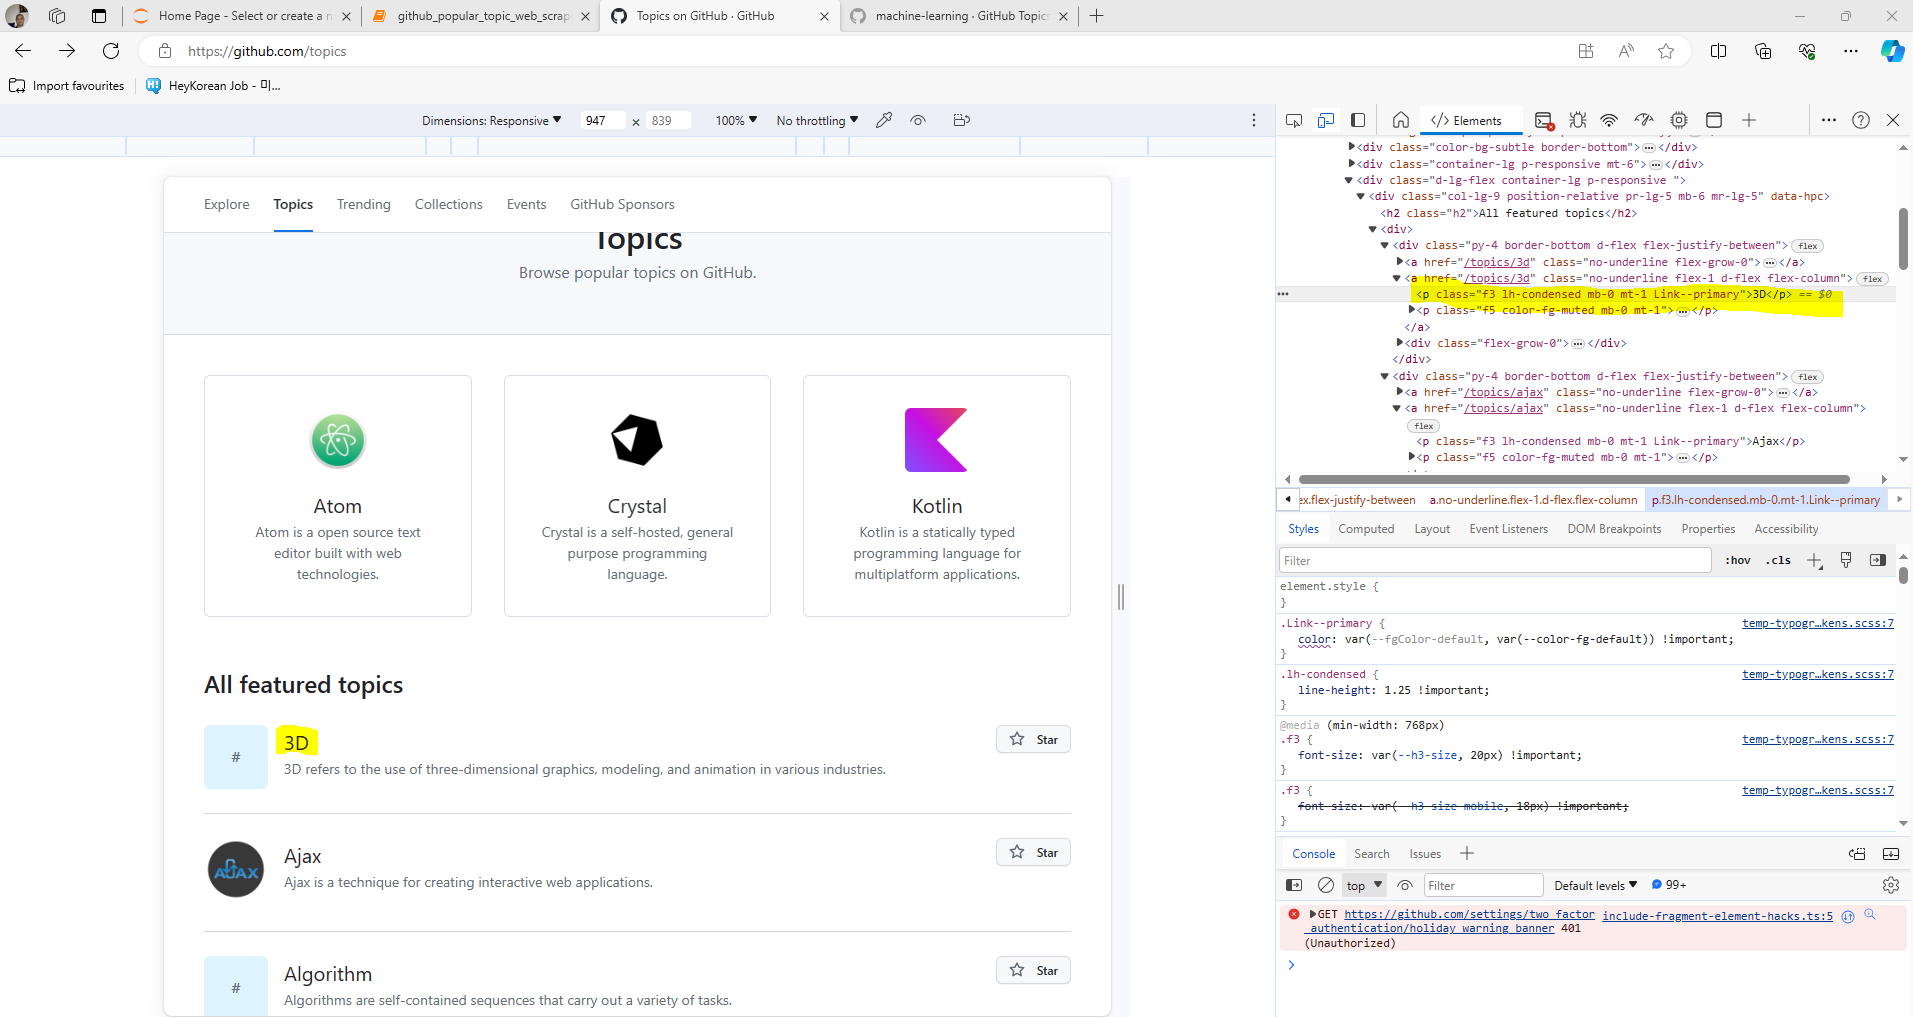

To get the title of the topic we have inspect on 3D title and have found the location of title inside 'p' and class: 'f3 lh-condensed mb-0 mt-1 Link--primary'. And from there we will get all the title on the first page of topics site. The screen shot above marked with yellow color shows the title and location. 

In [11]:
# Find all the title tags though their class and p location
selection_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'
# List all the paragraph for topic title tags
topic_title_tags = doc.find_all('p', {'class':selection_class})

In [12]:
# Find the total topics in page one
len(topic_title_tags)

30

In [13]:
# Show the first 5 title tag
topic_title_tags[:5]

[<p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Ajax</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Algorithm</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Amp</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Android</p>]

In [14]:
# Create an empty list for topic title
topic_titles = []
# View the first page all topic titles in a list
for tag in topic_title_tags:
    topic_titles.append(tag.text)
print(topic_titles)

['3D', 'Ajax', 'Algorithm', 'Amp', 'Android', 'Angular', 'Ansible', 'API', 'Arduino', 'ASP.NET', 'Atom', 'Awesome Lists', 'Amazon Web Services', 'Azure', 'Babel', 'Bash', 'Bitcoin', 'Bootstrap', 'Bot', 'C', 'Chrome', 'Chrome extension', 'Command line interface', 'Clojure', 'Code quality', 'Code review', 'Compiler', 'Continuous integration', 'COVID-19', 'C++']


### Finding Topic Title Description
We will inspect the page and find out the link source to collect title description text. 

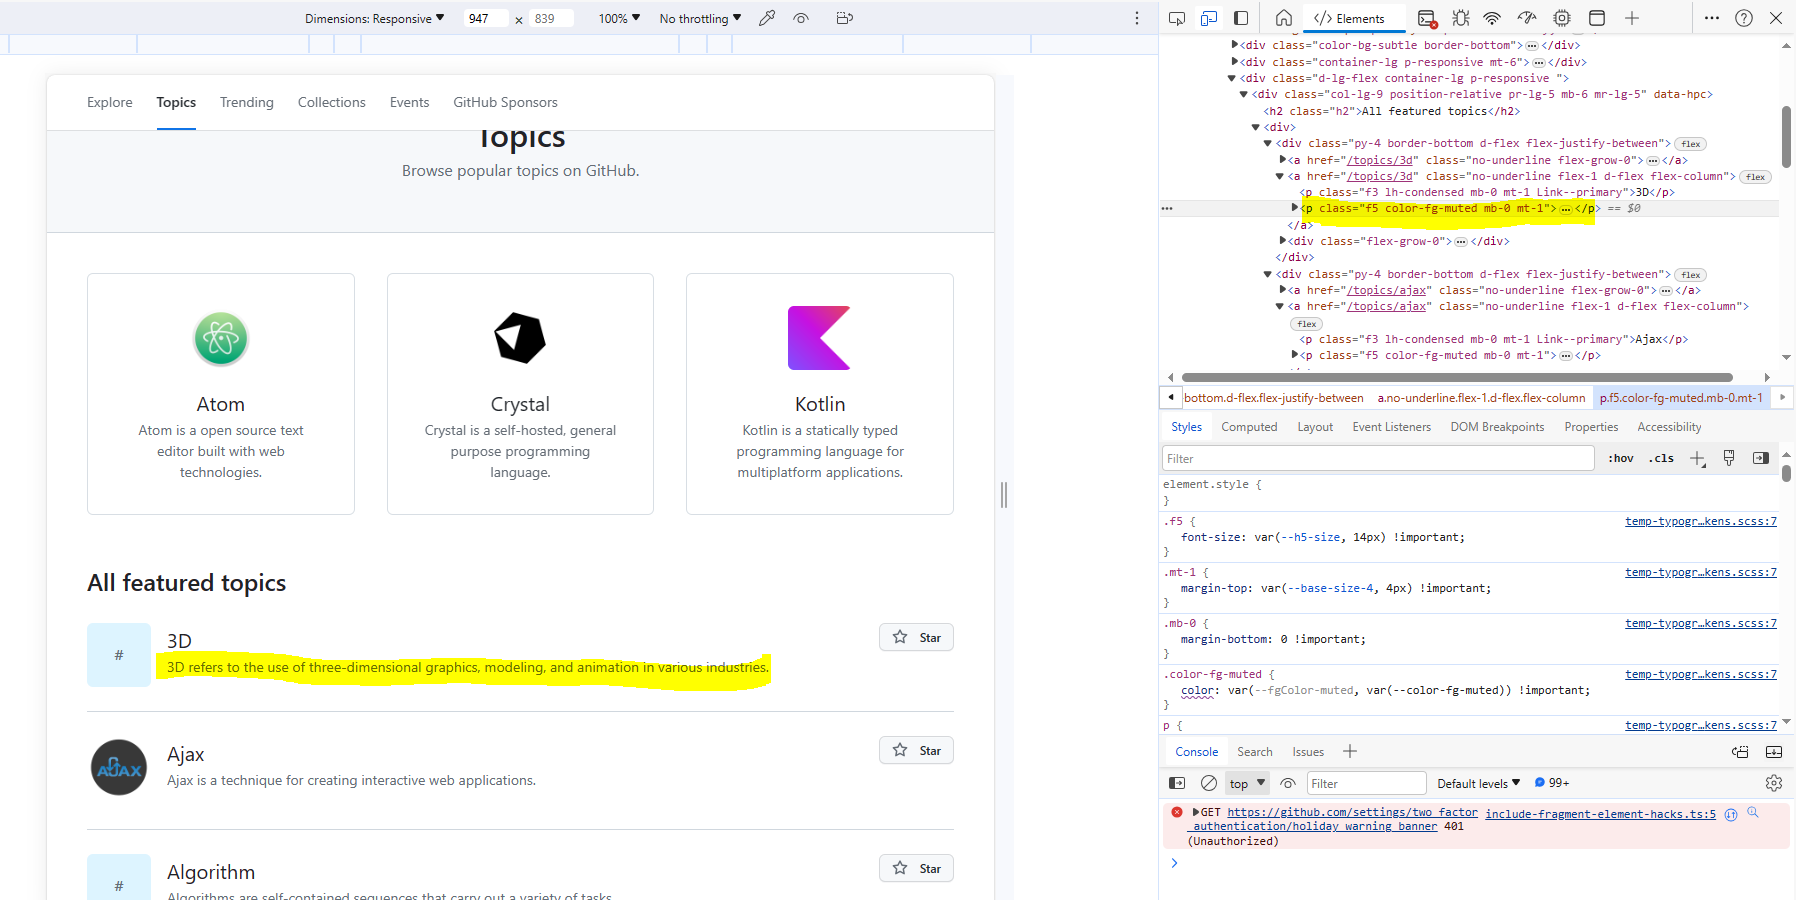

The yellow marked shows the title description and class name inside p attribute from the web page inspect elements. 

In [15]:
# Class for description tag
desc_selector = 'f5 color-fg-muted mb-0 mt-1'
# List all the paragraph for topic title description tags
topic_desc_tags = doc.find_all('p', {'class':desc_selector})

In [16]:
# View the first five title description tags
topic_desc_tags[:5]

[<p class="f5 color-fg-muted mb-0 mt-1">
           3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Ajax is a technique for creating interactive web applications.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Algorithms are self-contained sequences that carry out a variety of tasks.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Amp is a non-blocking concurrency library for PHP.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Android is an operating system built by Google designed for mobile devices.
         </p>]

In [17]:
# create an Empty list for topic title description
topic_desc = []
# show all the topic title description in a list
for tag in topic_desc_tags:
    topic_desc.append(tag.text.strip())
# view only first five title description
print(topic_desc[:5])

['3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.', 'Ajax is a technique for creating interactive web applications.', 'Algorithms are self-contained sequences that carry out a variety of tasks.', 'Amp is a non-blocking concurrency library for PHP.', 'Android is an operating system built by Google designed for mobile devices.']


### Finding the Topic Title link tags
To do that we will inspect the page and find the class where all links are placed.

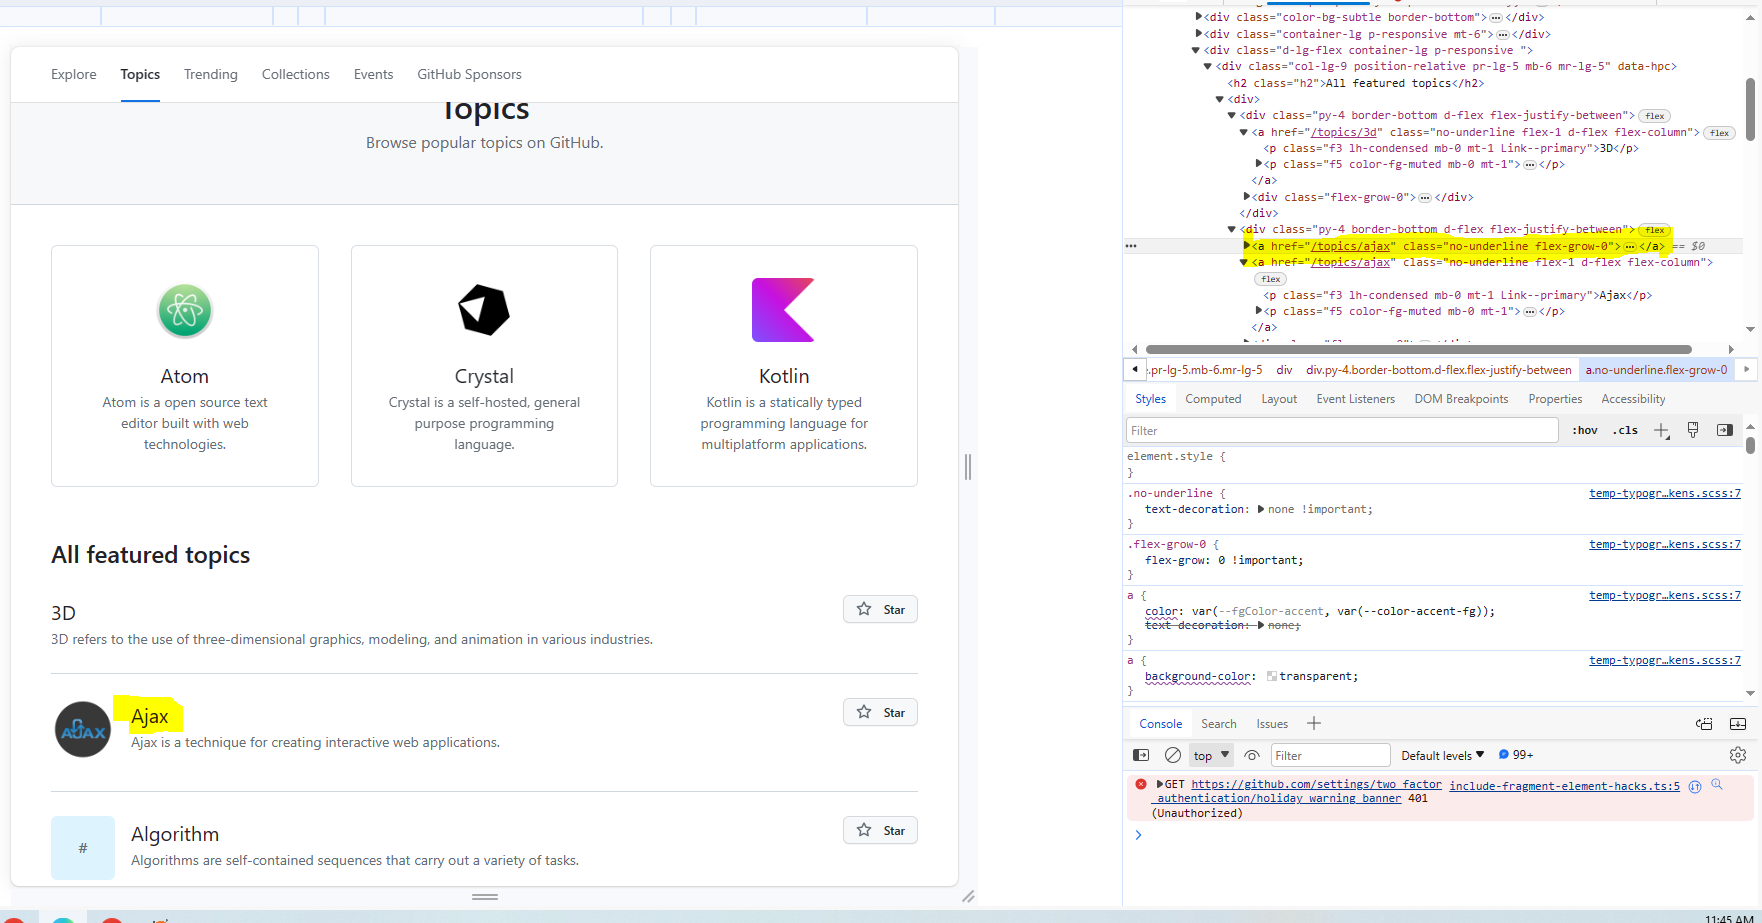

Yellow marks class: 'no-underline flex-grow-0' is the source code for topic title link tag inside the a attribute.

In [18]:
# Save all topic link tags in a variable called topic link tags
topic_link_tags = doc.find_all('a', {'class':'no-underline flex-grow-0'})

In [19]:
# View the first topic title link tag
topic_link_tags[0]

<a class="no-underline flex-grow-0" href="/topics/3d">
<div class="color-bg-accent f4 color-fg-muted text-bold rounded mr-3 flex-shrink-0 text-center" style="width:64px; height:64px; line-height:64px;">
            #
          </div>
</a>

In [20]:
# Add the base url with the link tags
base_url = "https://github.com"
topic0_url = base_url  + topic_link_tags[0]['href']
topic0_url

'https://github.com/topics/3d'

In [21]:
# Create an empty list for loading topic title url
topic_urls = []
# Create a list of title url links
for tag in topic_link_tags:
    topic_urls.append(base_url + tag['href'])
# view only first five links
print(topic_urls[:5]) 

['https://github.com/topics/3d', 'https://github.com/topics/ajax', 'https://github.com/topics/algorithm', 'https://github.com/topics/amphp', 'https://github.com/topics/android']


In [22]:
# Import pandas library to make a dataframe 
import pandas as pd

In [23]:
# Create a dictionary to make dataframe easier 
topics_dict = {
    'title': topic_titles,
    'description': topic_desc,
    'url': topic_urls
}

In [24]:
topics_df = pd.DataFrame(topics_dict)

In [25]:
topics_df.head()

,title,description,url
0,3D,3D refers to the use of three-dimensional grap...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android


### Create CSV file with the extracted information

In [26]:
# topics_df.to_csv('topics.csv', index=None)

This is so far first part completed from Project Outline where we have created a dataframe and csv file with mentioning the topic title, description and url link of topics. 

## Getting information out of a topic page

Starting with single topic information and then will collect top 25 topic information in one place. 

Start with 3D topic.

In [27]:
# 3D topic page url
topic_page_url = topic_urls[0]
topic_page_url

'https://github.com/topics/3d'

In [28]:
# Check the status code for web url
response = requests.get(topic_page_url)
response.status_code

200

In [29]:
# topic documentation achieved by html parse with Beautiful soup
topic_doc = BeautifulSoup(response.text, 'html.parser' )

### Find the repository name under 3D topic

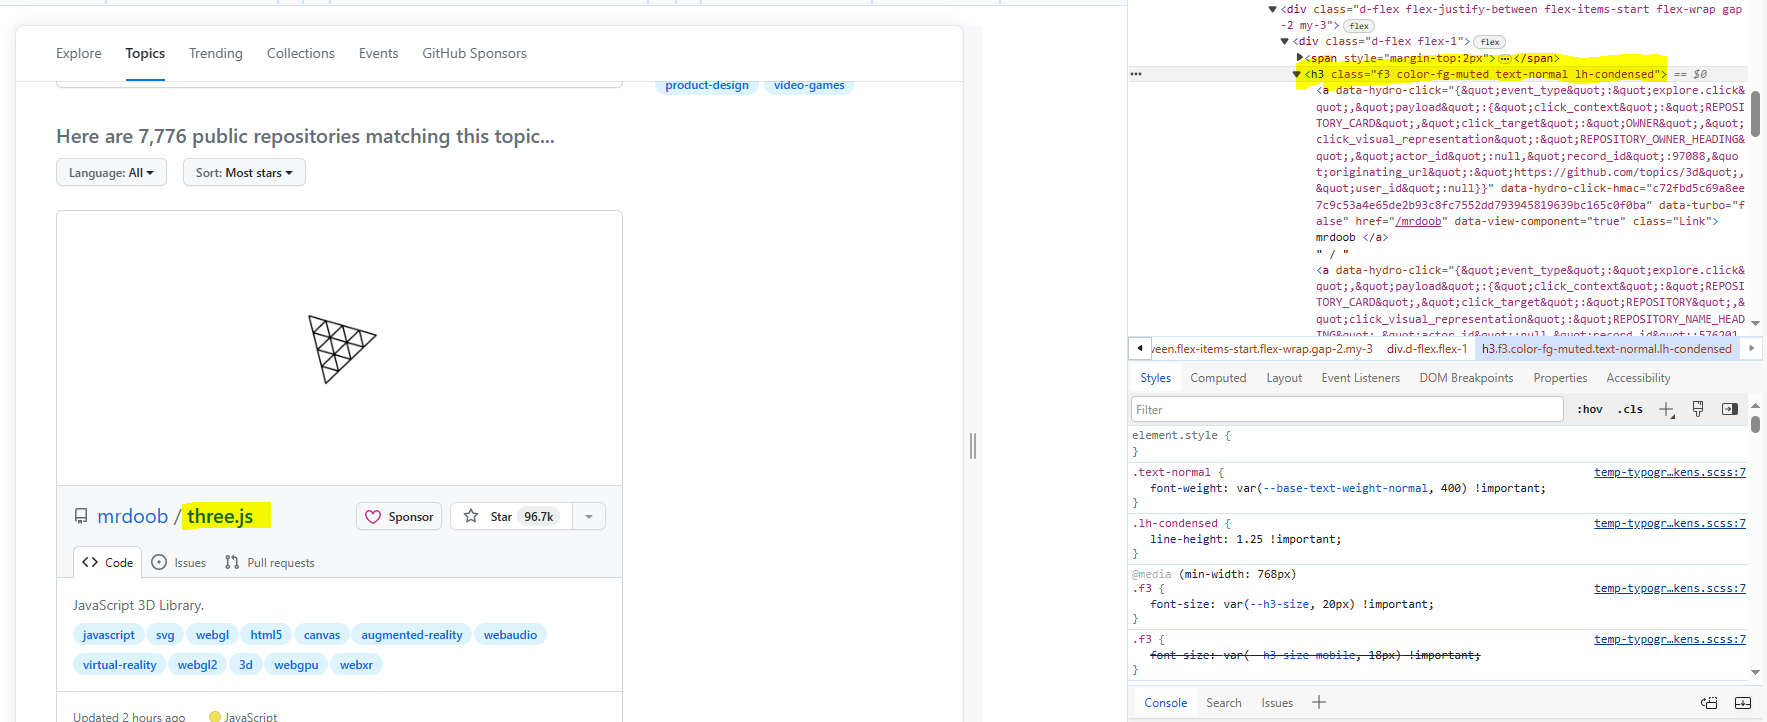

The yellow marked snippet shows the class to get the repository name from 3D topic. Using this inspect element method we can get other topics repository as well. 

In [30]:
# Class selection for repository tag
h3_selection_class = 'f3 color-fg-muted text-normal lh-condensed'
# Find all the repository tags inside the h3 paragraph
repo_tags = topic_doc.find_all('h3', {'class':h3_selection_class})
len(repo_tags)

20

In [31]:
# Display the first repository tag
repo_tags[0]

<h3 class="f3 color-fg-muted text-normal lh-condensed">
<a class="Link" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"OWNER","click_visual_representation":"REPOSITORY_OWNER_HEADING","actor_id":null,"record_id":97088,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="c72fbd5c69a8ee7c9c53a4e65de2b93c8fc7552dd793945819639bc165c0f0ba" data-turbo="false" data-view-component="true" href="/mrdoob">
            mrdoob
</a>          /
          <a class="Link text-bold wb-break-word" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_NAME_HEADING","actor_id":null,"record_id":576201,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="4a2667db3d63a1739c412e059e5da95afe419df83f70949b5d59dc3478f5c79a" data-turbo="false" data-view-component="true" href

We can see that from tag we can find repository tag name and username who created this tag.

In [32]:
# Save the repo tag in a_tags
a_tags = repo_tags[0].find_all('a')

# get only first tag username from all repo a_tags
a_tags[0].text.strip()

'mrdoob'

In [33]:
# get only first repo tag name from all repo a_tags
a_tags[1].text.strip()

'three.js'

In [34]:
# Make the repository tag url
repo_url = base_url + a_tags[1]['href']
print(repo_url)

https://github.com/mrdoob/three.js


### Finding star tags number count
To get the star tag numbers we will go though class 'counter js-social-count' and see like that from inspect. 

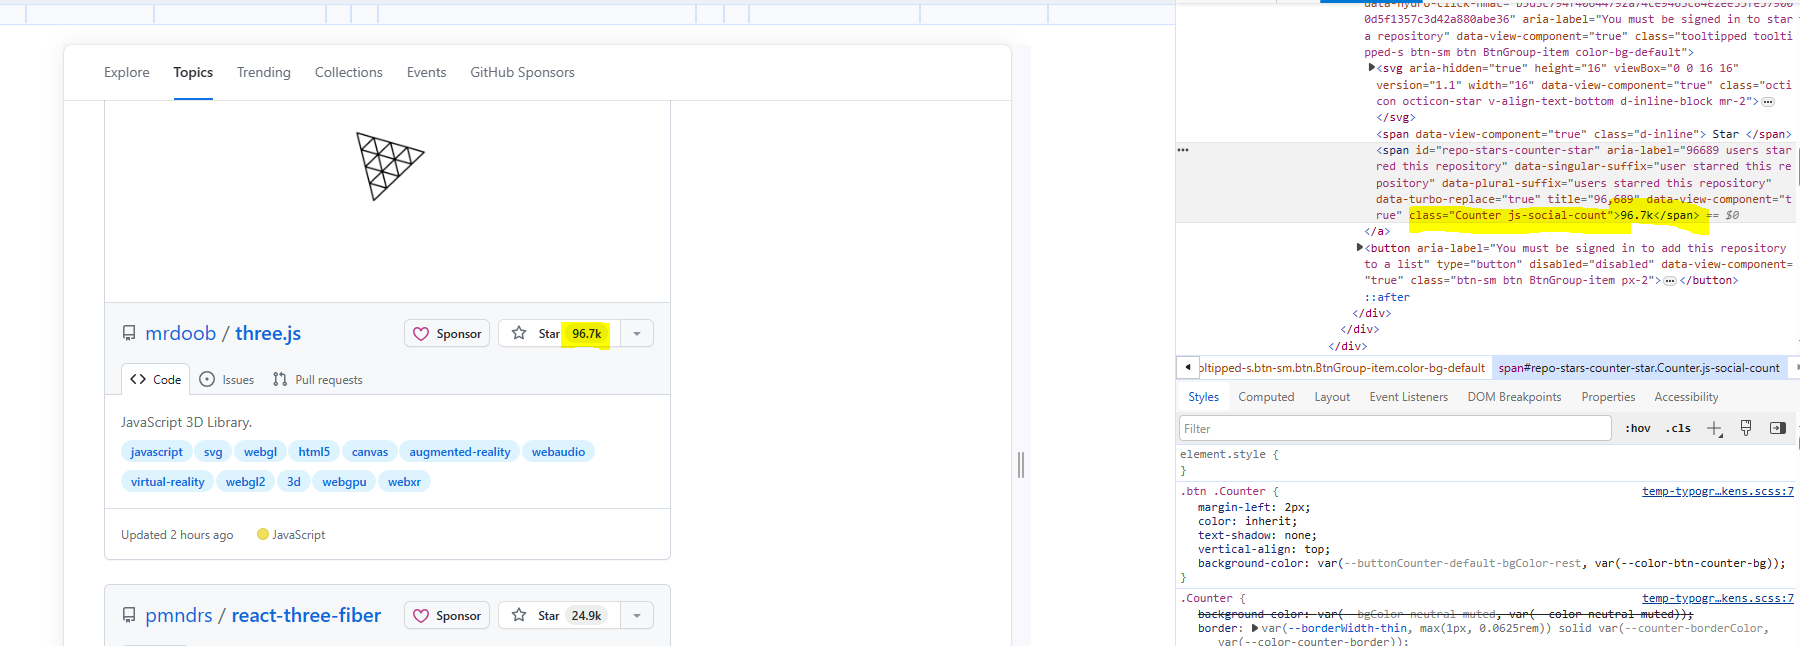

From yellow marked text, we can see the class and number of star counts for this repository as well.

In [35]:
# find all the star counts tag from a class inside the span
star_tags = topic_doc.find_all('span', {'class':'Counter js-social-count'})
# Display first 5 start count tags
star_tags[:5]

[<span aria-label="96693 users starred this repository" class="Counter js-social-count" data-plural-suffix="users starred this repository" data-singular-suffix="user starred this repository" data-turbo-replace="true" data-view-component="true" id="repo-stars-counter-star" title="96,693">96.7k</span>,
 <span aria-label="24886 users starred this repository" class="Counter js-social-count" data-plural-suffix="users starred this repository" data-singular-suffix="user starred this repository" data-turbo-replace="true" data-view-component="true" id="repo-stars-counter-star" title="24,886">24.9k</span>,
 <span aria-label="22340 users starred this repository" class="Counter js-social-count" data-plural-suffix="users starred this repository" data-singular-suffix="user starred this repository" data-turbo-replace="true" data-view-component="true" id="repo-stars-counter-star" title="22,340">22.3k</span>,
 <span aria-label="21872 users starred this repository" class="Counter js-social-count" data-p

As star tags are in text format, so, we will parse the tags to get the numeric value. We will use a function to parse the data. 

In [36]:
# defining function to parse the data
def parse_star_count(stars_str):
    stars_str = stars_str.strip()
    if stars_str[-1] =='k':
                  return int(float(stars_str[:-1])*1000)

In [37]:
parse_star_count(star_tags[0].text)

96700

In [38]:
# define a function to get repository information
def get_repo_info(h3_tag, star_tag):
    '''Define function get_repo_info.
    Set two parameters inside the function which will get all tags with a and star tag to get star count information.
    From the tags we will get username, repo name and repo url.
    Add stars count on stars variable.'''
    # Returns all the required info about the repository
    a_tags = h3_tag.find_all('a')
    username = a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    repo_url = base_url + a_tags[1]['href']
    stars = parse_star_count(star_tag.text)
    return username, repo_name, stars, repo_url

In [39]:
# Call the function to get first repository information from 3D topic
get_repo_info(repo_tags[0], star_tags[0])

('mrdoob', 'three.js', 96700, 'https://github.com/mrdoob/three.js')

In [40]:
# Creating empty dictionary to make our dataframe 
topic_repos_dict = {
    'username' : [],
    'repo_name': [],
    'stars': [],
    'repo_url': [] }
# Ínsert the values into the dictionary for 3D topic first page all repositories information
for i in range(len(repo_tags)):
    repo_info = get_repo_info(repo_tags[i], star_tags[i])
    topic_repos_dict['username'].append(repo_info[0])
    topic_repos_dict['repo_name'].append(repo_info[1])
    topic_repos_dict['stars'].append(repo_info[2])
    topic_repos_dict['repo_url'].append(repo_info[3])

In [41]:
# Creating dataframe for repository information
repo_df = pd.DataFrame(topic_repos_dict)
repo_df

,username,repo_name,stars,repo_url
0,mrdoob,three.js,96700,https://github.com/mrdoob/three.js
1,pmndrs,react-three-fiber,24900,https://github.com/pmndrs/react-three-fiber
2,libgdx,libgdx,22300,https://github.com/libgdx/libgdx
3,BabylonJS,Babylon.js,21900,https://github.com/BabylonJS/Babylon.js
4,ssloy,tinyrenderer,18700,https://github.com/ssloy/tinyrenderer
5,lettier,3d-game-shaders-for-beginners,16600,https://github.com/lettier/3d-game-shaders-for...
6,FreeCAD,FreeCAD,16200,https://github.com/FreeCAD/FreeCAD
7,aframevr,aframe,15900,https://github.com/aframevr/aframe
8,CesiumGS,cesium,11400,https://github.com/CesiumGS/cesium
9,blender,blender,10500,https://github.com/blender/blender


We have found 20 repositories information from first page of topic 3D. This is our 3rd objective from project outline. We achieved our target so far. But not limited here. I will go further more. 
I will use some concise way by using function and other pages information, other topics as well. In this project is limited. We can do like each topic top 25, 100 or all repositories data extraction. 

# Short code with function

# We will do for all repository for any pages

In [42]:
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_topic_page(topic_url):
    """
    Downloads and parses the HTML content of the given GitHub topic URL.

    Parameters:
    - topic_url (str): The URL of the GitHub topic.

    Returns:
    - BeautifulSoup: A BeautifulSoup object representing the parsed HTML document.
    """
    # Make a request to the topic URL
    response = requests.get(topic_url)
    
    # Check if the response is successful (status code 200)
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topic_url))
    
    # Parse the HTML content using BeautifulSoup
    topic_doc = BeautifulSoup(response.text, 'html.parser')
    return topic_doc

def get_repo_info(h3_tag, star_tag):
    """
    Extracts required information about a GitHub repository from its HTML tags.

    Parameters:
    - h3_tag (BeautifulSoup): The BeautifulSoup object representing the <h3> tag.
    - star_tag (BeautifulSoup): The BeautifulSoup object representing the <span> tag containing star count.

    Returns:
    - tuple: A tuple containing username, repo_name, stars, and repo_url.
    """
    # Extract information from the <h3> tag
    a_tags = h3_tag.find_all('a')
    username = a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    repo_url = base_url + a_tags[1]['href']
    
    # Parse the star count from the <span> tag
    stars = parse_star_count(star_tag.text)
    
    return username, repo_name, stars, repo_url

def get_topic_repos(topic_doc):
    """
    Extracts information about GitHub repositories from the parsed topic HTML document.

    Parameters:
    - topic_doc (BeautifulSoup): The BeautifulSoup object representing the parsed HTML document.

    Returns:
    - pandas.DataFrame: A DataFrame containing columns for username, repo_name, stars, and repo_url.
    """
    # Get <h3> tags containing repo title, repo URL, and username
    h3_selection_class = 'f3 color-fg-muted text-normal lh-condensed'
    repo_tags = topic_doc.find_all('h3', {'class': h3_selection_class})
    
    # Get <span> tags containing star counts
    star_tags = topic_doc.find_all('span', {'class': 'Counter js-social-count'})
    
    # Initialize a dictionary to store repo information
    topic_repos_dict = {
        'username': [],
        'repo_name': [],
        'stars': [],
        'repo_url': []
    }
    
    # Populate the dictionary with repo information
    for i in range(len(repo_tags)):
        repo_info = get_repo_info(repo_tags[i], star_tags[i])
        topic_repos_dict['username'].append(repo_info[0])
        topic_repos_dict['repo_name'].append(repo_info[1])
        topic_repos_dict['stars'].append(repo_info[2])
        topic_repos_dict['repo_url'].append(repo_info[3])
    
    # Convert the dictionary into a Pandas DataFrame
    return pd.DataFrame(topic_repos_dict)

def scrape_topic(topic_url, path):
    """
    Scrapes information about GitHub repositories for a specific topic and saves the results in a CSV file.

    Parameters:
    - topic_url (str): The URL of the GitHub topic.
    - path (str): The file path where the CSV file will be saved.

    Returns:
    - None
    """
    # Check if the CSV file already exists, and if yes, skip the scraping
    if os.path.exists(path):
        print("The file {} already exists. Skip...".format(path))
        return
    
    # Get DataFrame with repo information for the given topic
    topic_df = get_topic_repos(get_topic_page(topic_url))
    
    # Save the DataFrame to a CSV file
    topic_df.to_csv(path, index=None)


In [43]:
url4 = topic_urls[4]
topic4_doc = get_topic_page(url4)

In [44]:
topic4_repos = get_topic_repos(topic4_doc)
topic4_repos.head()

,username,repo_name,stars,repo_url
0,flutter,flutter,159000,https://github.com/flutter/flutter
1,facebook,react-native,114000,https://github.com/facebook/react-native
2,justjavac,free-programming-books-zh_CN,107000,https://github.com/justjavac/free-programming-...
3,Genymobile,scrcpy,96400,https://github.com/Genymobile/scrcpy
4,Hack-with-Github,Awesome-Hacking,73100,https://github.com/Hack-with-Github/Awesome-Ha...


In [45]:
# All these we can do in single line of code
get_topic_repos(get_topic_page(topic_urls[4]))

,username,repo_name,stars,repo_url
0,flutter,flutter,159000,https://github.com/flutter/flutter
1,facebook,react-native,114000,https://github.com/facebook/react-native
2,justjavac,free-programming-books-zh_CN,107000,https://github.com/justjavac/free-programming-...
3,Genymobile,scrcpy,96400,https://github.com/Genymobile/scrcpy
4,Hack-with-Github,Awesome-Hacking,73100,https://github.com/Hack-with-Github/Awesome-Ha...
5,Solido,awesome-flutter,49700,https://github.com/Solido/awesome-flutter
6,google,material-design-icons,49200,https://github.com/google/material-design-icons
7,wasabeef,awesome-android-ui,48200,https://github.com/wasabeef/awesome-android-ui
8,square,okhttp,44900,https://github.com/square/okhttp
9,android,architecture-samples,43400,https://github.com/android/architecture-samples


In [46]:
# All these we can do in single line of code for page url 5
print(topic_urls[5])
get_topic_repos(get_topic_page(topic_urls[5]))

https://github.com/topics/angular


,username,repo_name,stars,repo_url
0,justjavac,free-programming-books-zh_CN,107000,https://github.com/justjavac/free-programming-...
1,angular,angular,93100,https://github.com/angular/angular
2,storybookjs,storybook,81400,https://github.com/storybookjs/storybook
3,leonardomso,33-js-concepts,60300,https://github.com/leonardomso/33-js-concepts
4,ionic-team,ionic-framework,49900,https://github.com/ionic-team/ionic-framework
5,prettier,prettier,47600,https://github.com/prettier/prettier
6,Asabeneh,30-Days-Of-JavaScript,39800,https://github.com/Asabeneh/30-Days-Of-JavaScript
7,SheetJS,sheetjs,34100,https://github.com/SheetJS/sheetjs
8,angular,angular-cli,26400,https://github.com/angular/angular-cli
9,angular,components,23900,https://github.com/angular/components


# Write a single function to:
1. Get the list of topics from the topics page
2. Get the list of top repos from the individual topic pages
3. Get each topic, create a csv of the top repos for the topic

In [55]:
# Function to get topic titles from the HTML document
def get_topic_titles(doc):
    """
    Extracts GitHub topic titles from the provided HTML document.

    Parameters:
    - doc (BeautifulSoup): The BeautifulSoup object representing the HTML document.

    Returns:
    - list: A list of strings containing the extracted topic titles.
    """
    selection_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'
    topic_title_tags = doc.find_all('p', {'class': selection_class})
    
    topic_titles = []
    for tag in topic_title_tags:
        topic_titles.append(tag.text)
    return topic_titles

# Function to get topic descriptions from the HTML document
def get_topic_desc(doc):
    """
    Extracts GitHub topic descriptions from the provided HTML document.

    Parameters:
    - doc (BeautifulSoup): The BeautifulSoup object representing the HTML document.

    Returns:
    - list: A list of strings containing the extracted topic descriptions.
    """
    desc_selector = 'f5 color-fg-muted mb-0 mt-1'
    topic_desc_tags = doc.find_all('p', {'class': desc_selector})
    topic_desc = []
    for tag in topic_desc_tags:
        topic_desc.append(tag.text.strip())
    return topic_desc

# Function to get topic URLs from the HTML document
def get_topic_urls(doc):
    """
    Extracts GitHub topic URLs from the provided HTML document.

    Parameters:
    - doc (BeautifulSoup): The BeautifulSoup object representing the HTML document.

    Returns:
    - list: A list of strings containing the extracted topic URLs.
    """
    topic_link_tags = doc.find_all('a', {'class': 'no-underline flex-grow-0'})
    topic_urls = []
    base_url = 'https://github.com'
    for tag in topic_link_tags:
        topic_urls.append(base_url + tag['href'])
    return topic_urls

# Function to scrape topics and return a DataFrame
def scrape_topics():
    topics_url = 'https://github.com/topics'
    
    """
    Scrapes GitHub topics from the 'https://github.com/topics' page and organizes the
    information into a Pandas DataFrame.

    Returns:
    - pandas.DataFrame: A DataFrame containing columns for topic titles, descriptions, and URLs.
    """
    
    
    # Make a request to the topics URL
    response = requests.get(topics_url)
    
    # Check if the response is successful (status code 200)
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topics_url))
    
    # Parse the HTML content of the page using BeautifulSoup
    doc = BeautifulSoup(response.text, 'html.parser')
    
    # Create a dictionary containing topic titles, descriptions, and URLs
    topics_dict = {
        'title': get_topic_titles(doc),
        'description': get_topic_desc(doc),
        'url': get_topic_urls(doc)
    }  
    

In [56]:
# Define the function
def scrape_topics_repos():
    """
    Scrapes information about top repositories for GitHub topics and saves the results in CSV files.

    This function performs the following steps:
    1. Prints a message indicating the start of the scraping process.
    2. Calls the function `scrape_topics()` to get a DataFrame of GitHub topics.
    3. Creates a directory named 'github_topics' if it doesn't exist.
    4. Iterates through each row in the DataFrame of topics.
       a. Prints a message indicating the current topic being processed.
       b. Calls the function `scrape_topic()` to get repositories for the current topic.
       c. Saves the result in a CSV file in the 'github_topics' directory with the topic name.

    Note:
    - The function assumes the existence of the `scrape_topics()` and `scrape_topic()` functions.
    - The 'github_topics' directory is created to store the CSV files.

    Raises:
    - Exception: If the HTTP response status code is not 200 when requesting GitHub topics.

    Returns:
    - None
    """
    # Print a message indicating the start of the scraping process
    print('Scraping list of topics')
    
    # Call the function scrape_topics() to get a DataFrame of GitHub topics
    topics_df = scrape_topics()
    
    # Create a directory named 'github_topics' if it doesn't exist
    os.makedirs('github_topics', exist_ok=True)
    
    # Iterate through each row in the DataFrame
    for index, row in topics_df.iterrows():
        # Print a message indicating the current topic being processed
        print("Scraping top repositories for '{}'".format(row['title']))
        
        # Call the function scrape_topic() to get repositories for the current topic
        # Save the result in a CSV file in the 'github_topics' directory with the topic name
        scrape_topic(row['url'], 'github_topics/{}.csv'.format(row['title']))
        

In [ ]:
#scrape_topics_repos()

# Conclusion
This web scraping project was simple, easy to learn step by step to get the data as csv format from the github page. It is possible for any other website in the same way to extract the data using request, python, pandas and beautiful soup library. We have derived data from github to our local jupyter notebook, then from dataframe converted to csv format. This csv file can be use for data analysis and visualization purpose. As this project was limited only webscraping few topics from github and their few number of repositories, so we did that only. 
In future, I have plan to extract more data which cover more variables and more data which will be better analysis about github topic and repository. Then will share to public to gain easy access knowledge about github. 